In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import numpy as np
import statsmodels.api as sm


In [222]:
bike = pd.read_csv('/Users/Kadibhai/Downloads/Bike-Sharing-Dataset/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [280]:
X = scale(bike[['instant','season','yr','mnth','weekday','workingday','weathersit','temp','atemp','hum','windspeed']])
Y = bike.cnt

In [289]:
from sklearn.cross_validation import train_test_split

X = sm.add_constant(X)

# split into train and test
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [290]:
results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          8.61e-155
Time:                        14:13:50   Log-Likelihood:                -4005.8
No. Observations:                 489   AIC:                             8036.
Df Residuals:                     477   BIC:                             8086.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4485.3675     40.330    111.218      0.000    4406.122    4564.613
x1         -1012.2829    987.597     -1.025      0.306   -2952.861     928.295
x2           583.0486     77.123      7.560      0.000     431.505     734.592
x3          1865.9539    857.588      2.176      0.030     180.836    3551.071
x4           340.6567    497.253      0.685      0.494    -636.420    1317.733
x5           133.5911     39.301      3.399      0.001      56.366     210.816
x6            72.9394     39.663      1.839      0.067      -4.997     150.876
x7          -332.4407     51.840     -6.413      0.000    -434.304    -230.578
x8          -556.7916    516.465     -1.078      0.282   -1571.619     458.035
x9          1548.1797    521.784      2.967      0.003     522.900    2573.459
x10         -149.1199     55.230     -2.700      0.007    -257.645     -40.595
x11         -157.1017     45.967     -3.418      0.001    -247.424     -66.779
==============================================================================
Omnibus:                       52.917   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.328
Skew:                          -0.629   Prob(JB):                     1.34e-23
Kurtosis:                       4.894   Cond. No.                         59.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

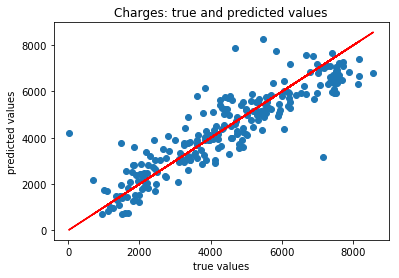

Mean absolute error of the prediction is: 645.3781711834181
Mean squared error of the prediction is: 778248.3883542696
Root mean squared error of the prediction is: 882.1838744583067
Mean absolute percentage error of the prediction is: 96.0527375264817


In [291]:
## predictions using OLS
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [292]:
### lets try the KNN

In [293]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Accuracy: 0.84 (+/- 0.11)


#### We can see that the KNN model has slightly higher R2 of .84 vs .79 for the OLS model this is probably due to the fact that the true model may not have a linear relationship and is better predicted via a k-neighbors approach.